<a href="https://colab.research.google.com/github/SLuis25/Simulaci-n-I/blob/main/Soluci%C3%B3n_de_problemas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

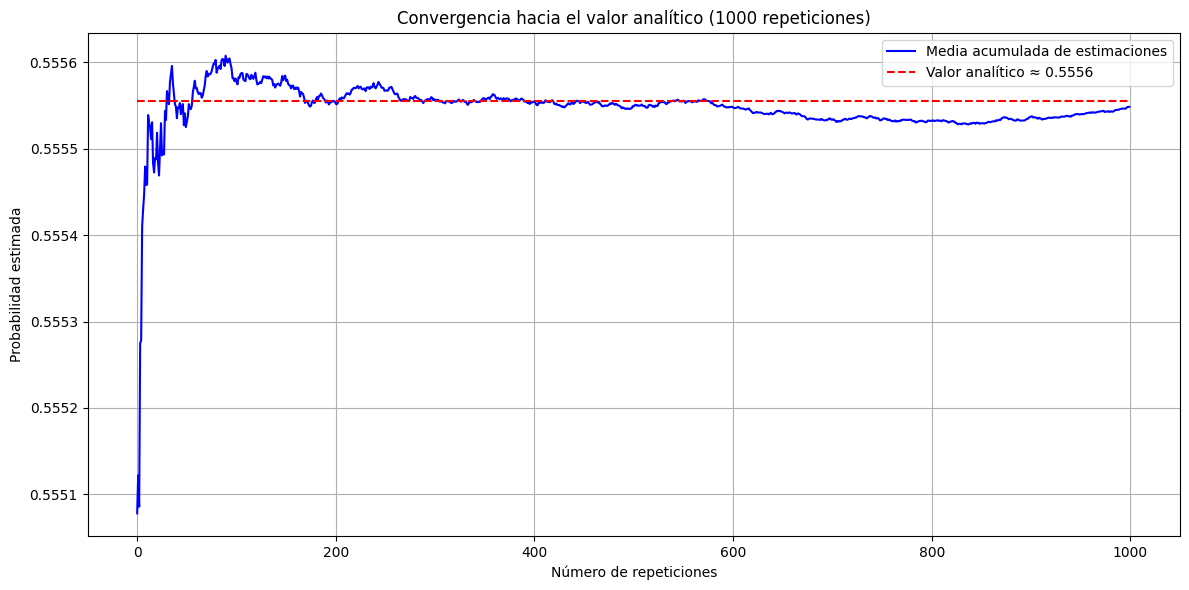


Promedio final de la estimación tras muchas repeticiones: 0.555549


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simular_probabilidad_espera(N, tiempo_max, espera_max):
    """
    Simula una sola vez la probabilidad de espera ≤ espera_max minutos.
    """
    llegada1 = np.random.uniform(0, tiempo_max, N)
    llegada2 = np.random.uniform(0, tiempo_max, N)
    tiempo_espera = np.abs(llegada1 - llegada2)
    exitos = np.sum(tiempo_espera <= espera_max)
    return exitos / N

def repetir_simulaciones(num_repeticiones, N, tiempo_max, espera_max):
    """
    Repite muchas simulaciones y grafica cómo la media acumulada se estabiliza.
    """
    resultados = np.empty(num_repeticiones)

    # Hacemos todas las simulaciones
    for i in range(num_repeticiones):
        resultados[i] = simular_probabilidad_espera(N, tiempo_max, espera_max)

    # Valor analítico exacto
    valor_analitico = 1 - ((tiempo_max - espera_max) / tiempo_max) ** 2

    # Cálculo de media acumulada para mostrar convergencia
    medias_acumuladas = np.cumsum(resultados) / np.arange(1, num_repeticiones + 1)

    # Gráfica
    plt.figure(figsize=(12, 6))
    plt.plot(medias_acumuladas, label='Media acumulada de estimaciones', color='blue')
    plt.hlines(valor_analitico, 0, num_repeticiones, colors='red', linestyles='--', label=f'Valor analítico ≈ {valor_analitico:.4f}')
    plt.xlabel('Número de repeticiones')
    plt.ylabel('Probabilidad estimada')
    plt.title(f'Convergencia hacia el valor analítico ({num_repeticiones} repeticiones)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Último valor de la media acumulada = promedio final
    promedio_final = medias_acumuladas[-1]
    return promedio_final

# Ejecutamos con valores más altos para mayor precisión
promedio = repetir_simulaciones(
    num_repeticiones=1000,  # Más repeticiones para mejor convergencia
    N=1000000,                # Simulaciones por repetición
    tiempo_max=30,
    espera_max=10
)

print(f"\nPromedio final de la estimación tras muchas repeticiones: {promedio:.6f}")